## 12. Machine learning techniques

In [2]:
import random as rd
rd.seed(0)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 12.1 Loading and exploring the dataset

#### First, we use pandas to load the dataset from a csv file

In [51]:
# use pabdas to read './titanic.csv'
raw_data = pd.read_csv("titanic.csv")
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Next, we can explore the dataset.

In [52]:
# Use pandas to examine some info of the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# Use pandas to examine the description of the dataset
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
raw_data.isnull().sum ()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 12.2. Cleaning up the data¶
#### Now, let's look at how many columns have missing data

##### The Cabin column is missing too many values to be useful. Let's drop it altogether.

##### Other columns such as Age or Embarked are missing some values, but they can still be useful.

##### For the age column, let's fill in the missing values with the median of all ages.

##### For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment

In [55]:
raw_data.drop('Cabin',axis='columns',inplace=True)

In [56]:
raw_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

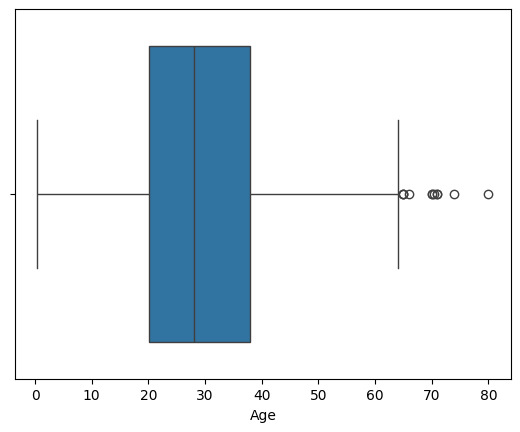

In [57]:
sns.boxplot (x='Age' , data = raw_data )

In [58]:
raw_data['Age']= raw_data['Age'].fillna(raw_data['Age'].median())
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [59]:
# use pandas to fill the na values in embarked column with 'U'

raw_data["Embarked"] = raw_data["Embarked"].fillna("U")

In [60]:
raw_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

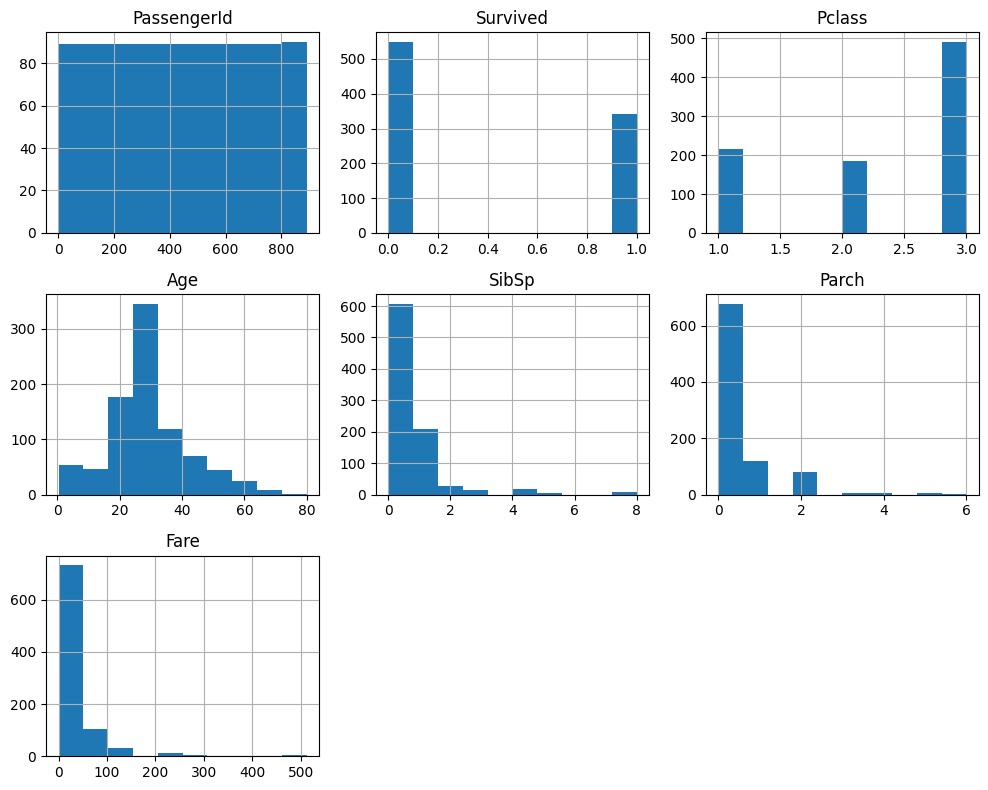

In [61]:
# Use pandas to examine the histograms of the dataset columns
import matplotlib.pyplot as plt

raw_data.hist(bins=10, figsize=(10, 8))
plt.tight_layout ()
plt.show()

  unique values and their counts  
  1 are Survived and 0 not Survived  
 Survived
0    549
1    342
Name: count, dtype: int64


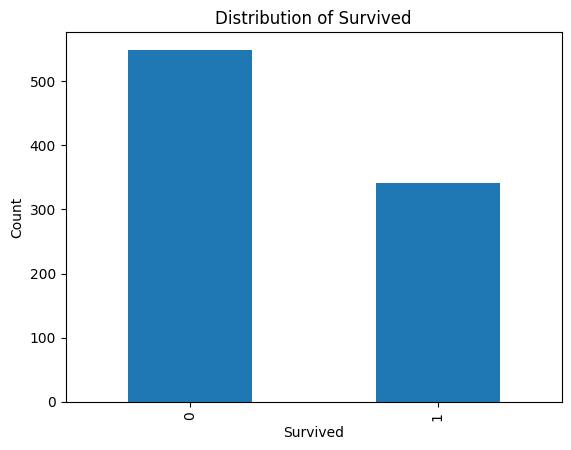

In [62]:
# Use pandas to examine "survived" column (labels)

#Check the unique values and their counts
survived_counts = raw_data['Survived'].value_counts()
print("  unique values and their counts ","\n", " 1 are Survived and 0 not Survived ", "\n" ,survived_counts)

# Plot a bar chart of the 'survived' column
raw_data['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()

In [63]:
# Use pandas to check how many passengers survived

survived_count = raw_data['Survived'].sum()
print("Number of passengers who survived:", survived_count)

Number of passengers who survived: 342


In [64]:
# Use pandas to exanine more than one column at the same time ["Name", "Age"]
raw_data[["Name", "Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",28.0
889,"Behr, Mr. Karl Howell",26.0


[38.70967742 59.80392157 67.50629723 56.28742515 61.79775281 58.33333333
 68.42105263 85.71428571]


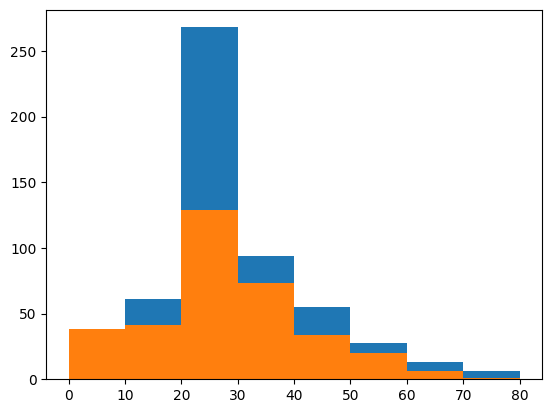

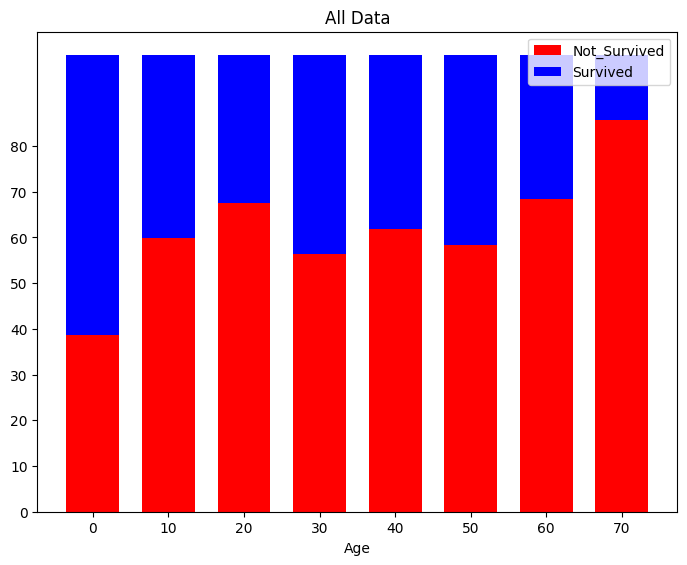

[36.66666667 24.44444444 29.6        16.66666667 31.25       11.11111111
  0.                 nan]


C:\Users\zahra\AppData\Local\Temp\ipykernel_26312\2380601806.py:30: RuntimeWarning: invalid value encountered in divide
  stacked_data = 100*values /values.sum(axis=0)


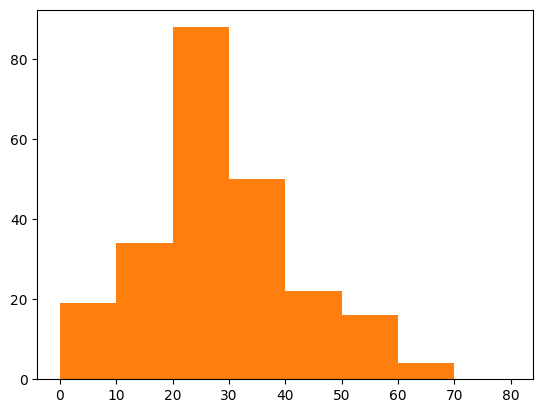

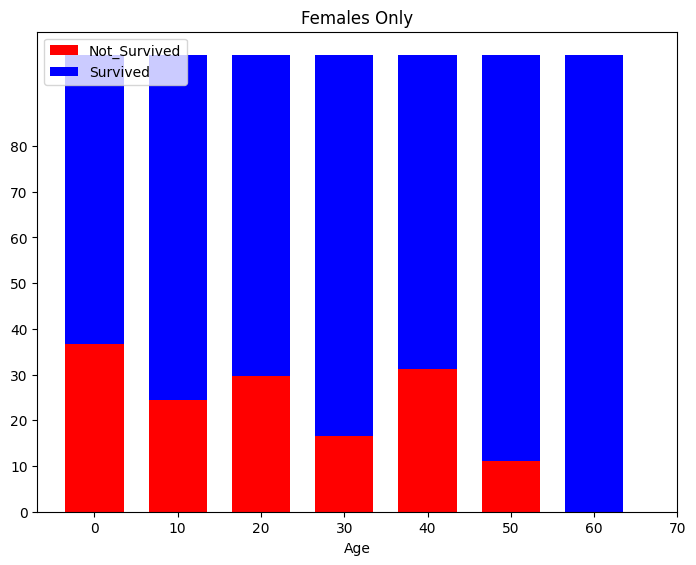

[40.625      87.71929825 84.92647059 78.5046729  78.94736842 86.66666667
 86.66666667 85.71428571]


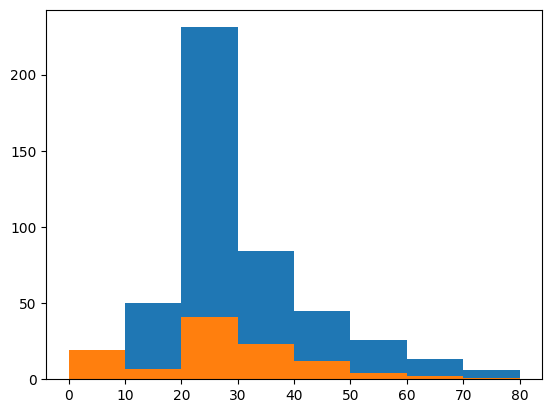

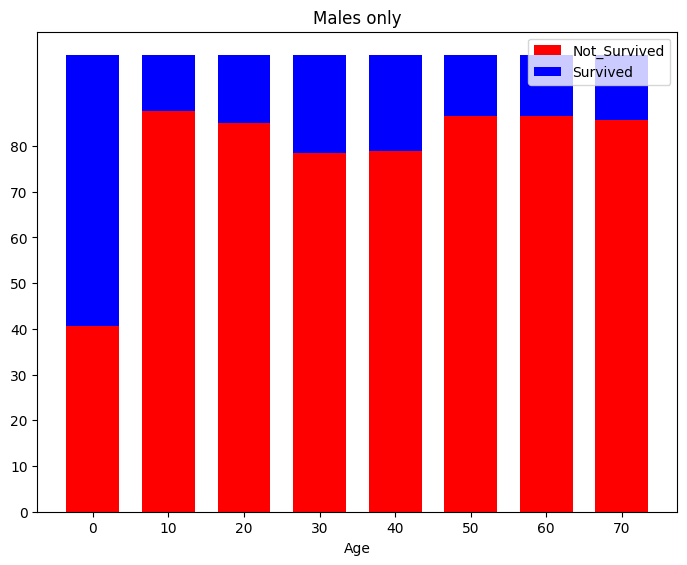

In [65]:
# visulaization
a=raw_data.where(raw_data["Survived"]==0)[["Age","Survived"]]
b=raw_data.where(raw_data["Survived"]==1)[["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('All Data')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()


a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="female"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="female"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Females Only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()

a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="male"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="male"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Males only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()

### 12.2.3 Saving our data for the future

In [66]:
# save the clean dataset to './clean_titanic_data.csv'
raw_data.to_csv('./clean_titanic_data.csv', index=None)


### 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding


In [67]:
preprocessed_data = pd.read_csv('clean_titanic_data.csv')
preprocessed_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [68]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(preprocessed_data[["Embarked", "Sex" , "Pclass"]]).toarray()
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_data

,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns

preprocessed_data = pd.concat([preprocessed_data,encoded_data],axis = 1)

In [70]:
preprocessed_data = preprocessed_data.drop(columns=["Embarked", "Sex" , "Pclass"])

In [71]:
preprocessed_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## 12.3.2 Binning

In [72]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Use .cut() method to make bins from the age column

categorized_age = pd.cut(preprocessed_data["Age"],bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)
preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,"(30, 40]"
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(30, 40]"
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,"(20, 30]"
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(10, 20]"
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"(20, 30]"


In [73]:
# Use pandas method .get_dummies() to get the one hot encoding of “Categorized_age”
# Use pandas method .drop() to remove the old column and method .concat() to add the new columns
Categorized_age = pd.get_dummies(preprocessed_data["Categorized_age"], prefix="Categorized_age")
preprocessed_data = pd.concat([preprocessed_data,Categorized_age], axis = 1)
preprocessed_data = preprocessed_data.drop(["Categorized_age"], axis = 1)
preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.0,0.0,1.0,...,0.0,1.0,False,False,True,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1.0,0.0,0.0,...,0.0,0.0,False,False,False,True,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,...,0.0,1.0,False,False,True,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.0,0.0,1.0,...,0.0,0.0,False,False,False,True,False,False,False,False
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0.0,0.0,1.0,...,0.0,1.0,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.0,0.0,1.0,...,1.0,0.0,False,False,True,False,False,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.0,0.0,1.0,...,0.0,0.0,False,True,False,False,False,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.0,0.0,1.0,...,0.0,1.0,False,False,True,False,False,False,False,False
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1.0,0.0,0.0,...,0.0,0.0,False,False,True,False,False,False,False,False


### 12.3.4 Feature selection

In [74]:
# drop these columns['Name', 'Ticket', 'PassengerId']
preprocessed_data = preprocessed_data.drop(['Name', 'Ticket', 'PassengerId'], axis = 1)

preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,False,False,False,True,False,False,False,False


### 12.3.5 Saving for future use

In [75]:
preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

### 12.4 Training models


In [76]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()


,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,False,False,False,True,False,False,False,False


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Survived                  891 non-null    int64  
 1   SibSp                     891 non-null    int64  
 2   Parch                     891 non-null    int64  
 3   Fare                      891 non-null    float64
 4   Embarked_C                891 non-null    float64
 5   Embarked_Q                891 non-null    float64
 6   Embarked_S                891 non-null    float64
 7   Embarked_U                891 non-null    float64
 8   Sex_female                891 non-null    float64
 9   Sex_male                  891 non-null    float64
 10  Pclass_1                  891 non-null    float64
 11  Pclass_2                  891 non-null    float64
 12  Pclass_3                  891 non-null    float64
 13  Categorized_age_(0, 10]   891 non-null    bool   
 14  Categorize

### 12.4.1 Features-labels split and train-validation split

In [78]:
# drop ["Survived"] column and save that to features
features = data.drop(["Survived"], axis = 1)

# save the ["Survived"] column to labels
labels = data["Survived"]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split (features ,labels , train_size =0.6 , random_state=100 )

In [81]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test = train_test_split (features ,labels , test_size = 0.5 , random_state=100 )

In [82]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
445
446
534
445
446



### 12.4.2 Training different models on our dataset

#### We'll train six models:

- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier


In [83]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

c:\Users\zahra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

DecisionTreeClassifier()

In [85]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(features_train, labels_train)

SVC()

In [86]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

RandomForestClassifier()

In [87]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

GradientBoostingClassifier()

In [88]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)

AdaBoostClassifier()

## 12.4.3 Evaluating the models
###### Accuracy

In [89]:
# print accuracy of each model on validation data
print("Scores of the models")
print("Logistic regression:", lr_model.score(features_validation, labels_validation))
print("Decision tree:", dt_model.score(features_validation, labels_validation))
print("SVM:", svm_model.score(features_validation, labels_validation))
print("Random forest:", rf_model.score(features_validation, labels_validation))
print("Gradient boosting:", gb_model.score(features_validation, labels_validation))
print("AdaBoost:", ab_model.score(features_validation, labels_validation))

Scores of the models
Logistic regression: 0.8292134831460675
Decision tree: 0.9617977528089887
SVM: 0.6719101123595506
Random forest: 0.9573033707865168
Gradient boosting: 0.903370786516854
AdaBoost: 0.8404494382022472


##### F1-score


In [90]:
# print F1-score of each model on validation data
from sklearn.metrics import f1_score

print("F1-scores of the models:")

lr_predicted_labels = lr_model.predict(features_validation)
print("Logistic regression:", f1_score(labels_validation, lr_predicted_labels))

dt_predicted_labels = dt_model.predict(features_validation)
print("Decision Tree:", f1_score(labels_validation, dt_predicted_labels))

svm_predicted_labels = svm_model.predict(features_validation)
print("Support Vector Machine:", f1_score(labels_validation, svm_predicted_labels))

rf_predicted_labels = rf_model.predict(features_validation)
print("Random Forest:", f1_score(labels_validation, rf_predicted_labels))

gb_predicted_labels = gb_model.predict(features_validation)
print("Gradient boosting:", f1_score(labels_validation, gb_predicted_labels))

ab_predicted_labels = ab_model.predict(features_validation)
print("AdaBoost:", f1_score(labels_validation, ab_predicted_labels))

F1-scores of the models:
Logistic regression: 0.7414965986394559
Decision Tree: 0.9442622950819672
Support Vector Machine: 0.34821428571428575
Random Forest: 0.9389067524115756
Gradient boosting: 0.8580858085808581
AdaBoost: 0.7687296416938111


## 12.4.4 Testing the model

###### Finding the accuracy and the F1-score of the model in the testing set

In [91]:
# print accuracy of gradient boost model on testing data
gb_model.score(features_test, labels_test)

0.8340807174887892

In [92]:
# print F1-score of gradient boost model on testing data
gb_predicted_test_labels = gb_model.predict(features_test)
f1_score(labels_test, gb_predicted_test_labels)

0.7848837209302325

## 12.5 Grid search


In [93]:
from sklearn.model_selection import GridSearchCV
# Grid search with an rbf kernel

print("SVM grid search ")

# rbf, C=1, gamma=0.1
svm_1_01 = SVC(kernel='rbf', C=1, gamma=0.1)
svm_1_01.fit(features_train, labels_train)
print("C=1, gamma=0.1", svm_1_01.score(features_validation, labels_validation))

# rbf, C=1, gamma=1
svm_1_1 = SVC(kernel='rbf', C=1, gamma=1)
svm_1_1.fit(features_train, labels_train)
print("C=1, gamma=1", svm_1_1.score(features_validation, labels_validation))

# rbf, C=1, gamma=10
svm_1_10 = SVC(kernel='rbf', C=1, gamma=10)
svm_1_10.fit(features_train, labels_train)
print("C=1, gamma=10", svm_1_10.score(features_validation, labels_validation))

# rbf, C=10, gamma=0.1
svm_10_01 = SVC(kernel='rbf', C=10, gamma=0.1)
svm_10_01.fit(features_train, labels_train)
print("C=10, gamma=0.1", svm_10_01.score(features_validation, labels_validation))

# rbf, C=10, gamma=1
svm_10_1 = SVC(kernel='rbf', C=10, gamma=1)
svm_10_1.fit(features_train, labels_train)
print("C=10, gamma=1", svm_10_1.score(features_validation, labels_validation))

# rbf, C=10, gamma=10
svm_10_10 = SVC(kernel='rbf', C=10, gamma=10)
svm_10_10.fit(features_train, labels_train)
print("C=10, gamma=10", svm_10_10.score(features_validation, labels_validation))

SVM grid search 
C=1, gamma=0.1 0.8674157303370786
C=1, gamma=1 0.9415730337078652
C=1, gamma=10 0.950561797752809
C=10, gamma=0.1 0.9280898876404494
C=10, gamma=1 0.9483146067415731
C=10, gamma=10 0.9595505617977528


In [94]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(features_train, labels_train)

svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.8471910112359551

In [95]:
svm_winner

SVC(C=10, gamma=0.01)

### 12.6 Cross validation

In [96]:
# print the k-fold cross validation output
svm_gs.cv_results_

{'mean_fit_time': array([0.00506339, 0.0036078 , 0.00515141, 0.00601153, 0.0060977 ,
        0.00465202, 0.00637345, 0.00958829, 0.00690765, 0.00614533,
        0.00579133, 0.00588183, 0.00804534, 0.00915604, 0.00574875,
        0.00648956, 0.00821199, 0.00732794, 0.00754628, 0.00640903,
        0.00871286, 0.01075373, 0.0064054 , 0.00797725, 0.00757113]),
 'std_fit_time': array([0.00130181, 0.00037222, 0.00054966, 0.00040193, 0.0008564 ,
        0.00039994, 0.0009155 , 0.00451599, 0.00170368, 0.00020827,
        0.00214623, 0.00085365, 0.00156468, 0.00222469, 0.00084403,
        0.00189773, 0.00313222, 0.00160222, 0.00087882, 0.00079215,
        0.00075312, 0.00340971, 0.00081614, 0.00063505, 0.00115821]),
 'mean_score_time': array([0.00375342, 0.0029356 , 0.00323839, 0.00390387, 0.00415621,
        0.00412912, 0.00389209, 0.00697675, 0.00352345, 0.00392871,
        0.00326715, 0.00357423, 0.00432863, 0.00519676, 0.00363946,
        0.0032064 , 0.00320454, 0.0033267 , 0.00443025, 0.00